# Introduction to Probability

Ransalu Senanayake

# 1 Probability Distributions

## 1.1 Continuous random variables

Some of the methods in scipy.stats library for random variables include,
* rvs: Random Variables
* pdf/pmf: Probability Density/Mass Function
* cdf: Cumulative Distribution Function
* stats: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
* moment: non-central moments of the distribution

In [ ]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

from scipy import stats as st

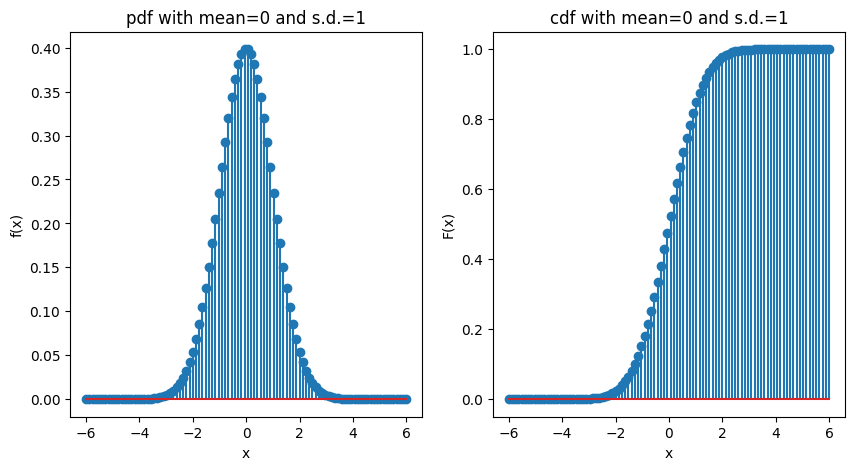

In [ ]:
mean, sd = 0, 1
x = np.linspace(mean - 6*sd, mean + 6*sd, 100)
f = st.norm.pdf(x=x, loc=mean, scale=sd)
F = st.norm.cdf(x=x, loc=mean, scale=sd)

pl.figure(figsize=(10,5))
pl.subplot(121)
pl.stem(x, f); pl.xlabel('x'); pl.ylabel('f(x)'); pl.title('pdf with mean={} and s.d.={}'.format(mean, sd))
pl.subplot(122)
pl.stem(x, F); pl.xlabel('x'); pl.ylabel('F(x)'); pl.title('cdf with mean={} and s.d.={}'.format(mean, sd))
pl.show()

**Exercise 1.1.1** Change location and scale parameters (e.g. loc=1, scale=0.25) and observe results.

## 1.2 Discrete random variables

**Exercise 1.2.1** In an urn that contains M=100 different currency bills, n=25 bills are dollars. Plot the pmf and cdf if N=15 bills are randomly drawn *without replacement*.

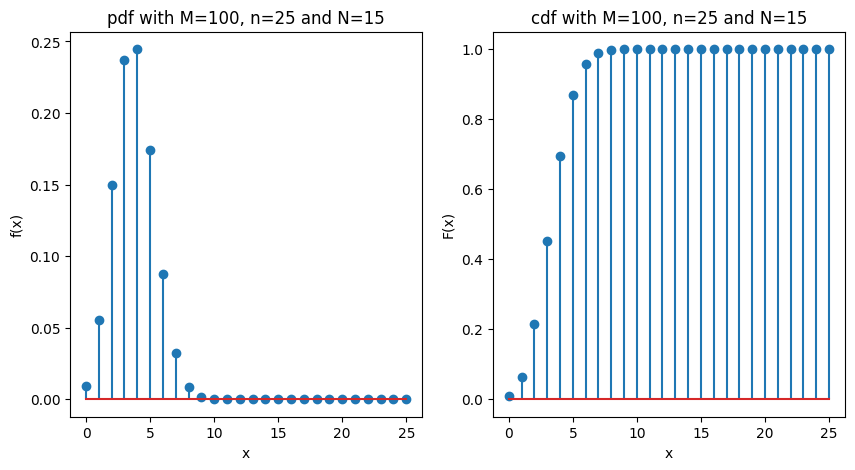

In [ ]:
#Answer
M, n, N = 100, 25, 15 #Population, Successes, No of draws
x = np.arange(0, n+1)
f = st.hypergeom.pmf(x, M, n, N)
F = st.hypergeom.cdf(x, M, n, N)

pl.figure(figsize=(10,5))
pl.subplot(121)
pl.stem(x, f); pl.xlabel('x'); pl.ylabel('f(x)'); pl.title('pdf with M={}, n={} and N={}'.format(M, n, N))
pl.subplot(122)
pl.stem(x, F); pl.xlabel('x'); pl.ylabel('F(x)'); pl.title('cdf with M={}, n={} and N={}'.format(M, n, N))
pl.show()

#2. Sampling

## 2.1 Pseudo-random number generators (PRNG)

**Exercise 2.1.1** Discuss how random numbers are generated in a computer (Turing machine).

## 2.2 Sampling from a distribution

Normal distribution

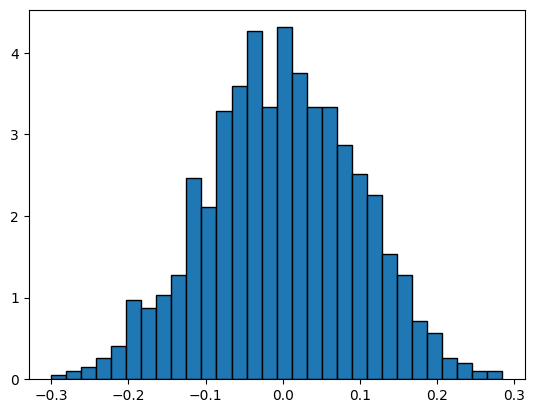

In [ ]:
mu, sigma = 0, 0.1  # mean and standard deviation
samples = np.random.normal(mu, sigma, 1000)  # or use scipy.stats.rvs(size=1000)

count, bins, ignored = pl.hist(samples, bins=30, density=True,edgecolor='black')  # Using density instead of normed
pl.show()

Multivaraiate normal

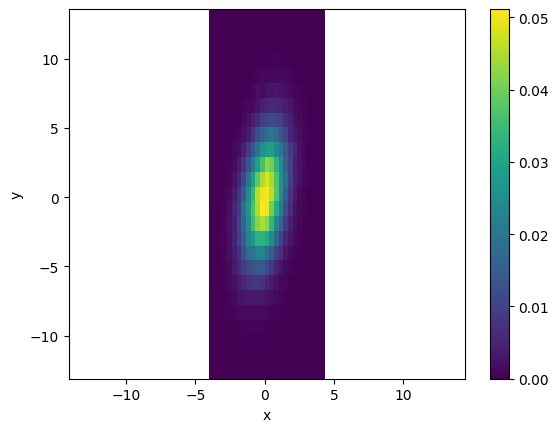

In [ ]:
mean = (0, 0)
cov = [[1, 1], [1, 10]]
x, y = np.random.multivariate_normal(mean, cov, 100000).T

#pl.scatter(x, y)
# pl.hist2d(x, y, 25, normed=True) #hexbin
pl.hist2d(x, y, bins=25, density=True)  # Change normed to density, use bins parameter
pl.xlabel('x'); pl.ylabel('y')
pl.colorbar()
pl.axis('equal')
pl.show()
del x, y

**Exercise 2.2.1** Observe the probability distribution by varying mean and covariance.

## 2.2 Monte Carlo (MC) methods - optional

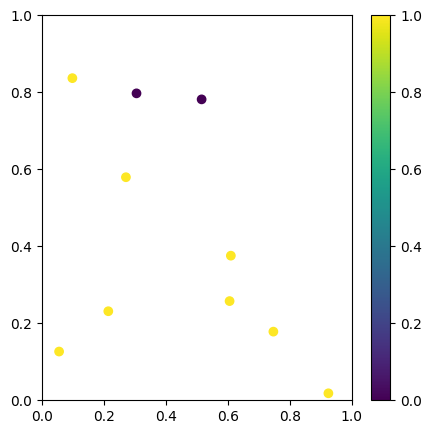

Number of samples = 10
Number of samples that satisfies the condition = 8
Proportion of samples that satisfies the condition = 0.8


In [ ]:
N = 10
x_samples, y_samples = np.random.random(N), np.random.random(N)

condition = x_samples + y_samples < 1

pl.figure(figsize=(5,5))
# pl.scatter(x_samples, y_samples, c=condition, edgecolor='black')
pl.scatter(x_samples, y_samples, c=condition)
pl.colorbar()
pl.axis([0, 1, 0, 1])
pl.show()

print('Number of samples = {}'.format(N))
print('Number of samples that satisfies the condition = {}'.format(np.count_nonzero(condition)))
print('Proportion of samples that satisfies the condition = {}'.format(np.count_nonzero(condition)/N))

**Exercise 2.2.1** Vary the number of samples $N$ and observe results.

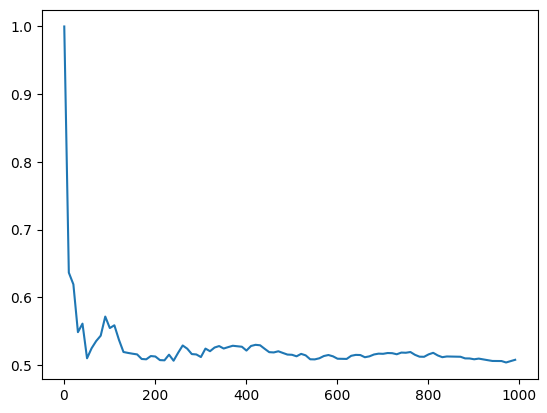

In [ ]:
N = 1000
x_samples, y_samples = np.random.random(N), np.random.random(N)
smp_rng = range(1, 1000, 10)
cnt = []
for n in smp_rng:
  condition = x_samples[:n] + y_samples[:n] < 1
  cnt.append(np.count_nonzero(condition)/n)

pl.plot(smp_rng, cnt)

**Exercise 2.2.2** Use Monte Carlo simulation to estimate the value of $\pi$.

Hint: The equation of a circle is $x^2 + y^2 = r^2$ and area is $\pi r^2$.

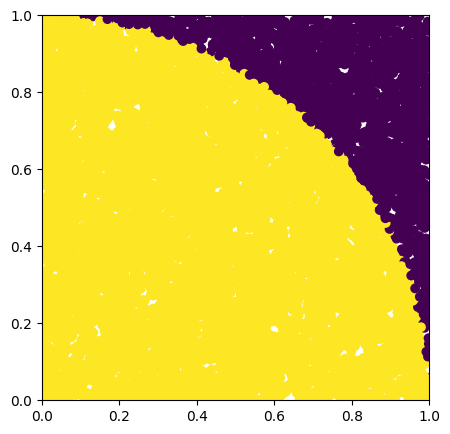

Number of samples inside the square = 10000
Number of samples inside the quarter-circle = 7908
Value of pi = 3.1632


In [ ]:
#Answer
N = 10000
x_samples, y_samples = np.random.random(N), np.random.random(N)

condition = x_samples**2 + y_samples**2 < 1

pl.figure(figsize=(5,5))
# pl.scatter(x_samples, y_samples, c=condition, edgecolor='')
pl.scatter(x_samples, y_samples, c=condition)
pl.axis([0, 1, 0, 1])
pl.show()

print('Number of samples inside the square = {}'.format(N))
print('Number of samples inside the quarter-circle = {}'.format(np.count_nonzero(condition)))
print('Value of pi = {}'.format(4*np.count_nonzero(condition)/N ))

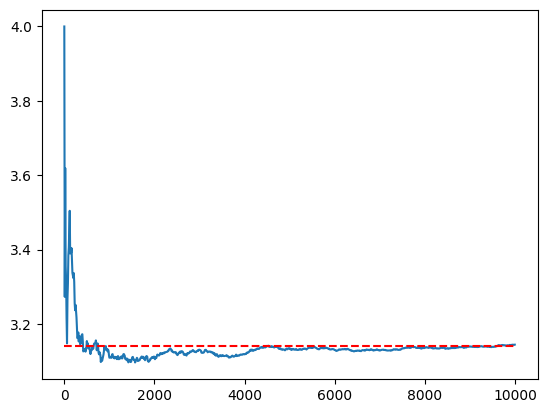

In [ ]:
N = 10000
x_samples, y_samples = np.random.random(N), np.random.random(N)
smp_rng = range(1, N, 10)
cnt = []
for n in smp_rng:
  condition = x_samples[:n]**2 + y_samples[:n]**2 < 1
  cnt.append(4*np.count_nonzero(condition)/n)

pl.plot(smp_rng, cnt)
pl.plot([0, N], [np.pi, np.pi], 'r--')

## 2.4 Central Limit Theorem (CLT) - optional

Crude idea:
The distibution of averaging of N random varaibles, each having a mean $\mu$ and variance $\sigma^2$, follows a normal distibution with mean $\mu$ and variance $\sigma^2/N$ as N increases.

Theorem - Let $X_1, X_2,...,X_N$ be a sequence of *iid* (independent and identically distributed) random variables (discrete or continuous). Let $E[X_i] = \mu$ and $Var[X_i] = \sigma^2  > 0$ and both are finite (*moment-generating-function* exists). As $N \to \infty$ the sample average $\bar{X}_n = (1/n)\Sigma_{i=1}^{N} \xrightarrow{a.s.} \mu$.

Laws of Large Numbers:
* Definition - Convergence in probability:
A sequence of random variables $X_1, X_2,...,X_N$ *converges in probability* to a random variable $X$ if,
\begin{equation}
    \lim_{N\to\infty}P(|X_N-X|<\epsilon) = 1, \forall \epsilon>0
\end{equation}

* Theorem - Weak Law of Large Numbers (WLLN):
Let $X_1, X_2,...,X_N$ be a sequence of *iid* random variables. Let population statistics $\mathrm{E}[X_i] = \mu$ and $\mathrm{Var}[X_i] = \sigma^2  > 0$ (both are finite). Define sample mean $\bar{X}_N = (1/n)\Sigma_{i=1}^{N} X_i$.
\begin{equation}
    \lim_{N\to\infty}P(|\bar{X}_N-\mu|<\epsilon) = 1, \forall \epsilon>0
\end{equation}
i.e. $\bar{X}_N$ converges in probability to $\mu$.

* Theorem - Strong Law of Large Numbers (SLLN):
Let $X_1, X_2,...,X_N$ be a sequence of *iid* random variables. Let population statistics $\mathrm{E}[X_i] = \mu$ and $\mathrm{Var}[X_i] = \sigma^2  > 0$ (both are finite). Define sample mean $\bar{X}_N = (1/n)\Sigma_{i=1}^{N} X_i$.
\begin{equation}
    P(\lim_{N\to\infty}|X_N-X|<\epsilon) = 1, \forall \epsilon>0
\end{equation}
i.e. $\bar{X}_N$ converges *almost surely (a.s.)* (meaning, with probability = 1) to $\mu$.

Note: assumption of finite variance can be relaxed.

Note: In order for SLLN to hold P should converge pointwise (limit is inside P). SLLN $\implies$ WLLN.

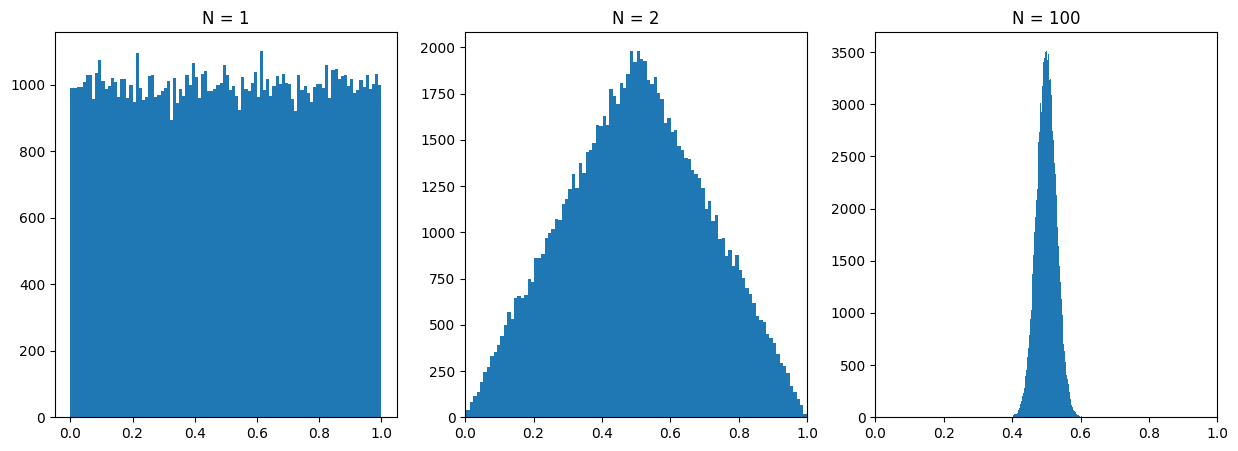

In [ ]:
import numpy as np
import matplotlib.pyplot as pl

N = 100  # Changed N to 100
x = np.random.random((N, int(1E5)))  # Casted 1E5 to int

pl.figure(figsize=(15, 5))

Na = 1
pl.subplot(131)
pl.hist(x[:Na, :].mean(0), 100)
pl.title('N = {}'.format(Na))

pl.subplot(132)
Nb = 2
pl.hist(x[:Nb, :].mean(0), 100)
pl.axis([0, 1, 0, None])
pl.title('N = {}'.format(Nb))

pl.subplot(133)
Nc = N
pl.hist(x[:Nc, :].mean(0), 100)
pl.axis([0, 1, 0, None])
pl.title('N = {}'.format(Nc))

pl.show()

del x


#3. Information Theory

##3.1 Entropy

Entropy is a measure of uncertainty.
\begin{equation}
    \mathrm{H}[x] := \sum_x p(x)log_n \frac{1}{p(x)} = -\sum_x p(x)log_n \big( p(x) \big)
\end{equation}

If n=2, the unit of measurement is in bits.

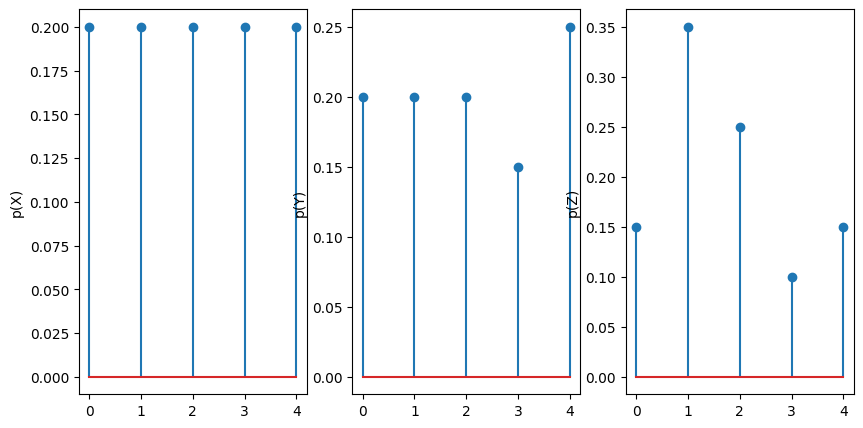

2.321928094887362 2.303701696057348 2.1833830982290134


In [ ]:
#Observe how Entropy changes with the spread of data
X = np.arange(5)
Z = Y = X

pX = np.array([ 0.2, 0.2, 0.2, 0.2, 0.2])
pY = np.array([ 0.2, 0.2, 0.2, 0.15, 0.25])
pZ = np.array([ 0.15, 0.35, 0.25, 0.1, 0.15])

pl.figure(figsize=(10,5))
pl.subplot(131)
pl.stem(X, pX)
pl.ylabel('p(X)')

pl.subplot(132)
pl.stem(Y, pY)
pl.ylabel('p(Y)')

pl.subplot(133)
pl.stem(Z, pZ)
pl.ylabel('p(Z)')

pl.show()

def calc_entropy(p):
    return -np.sum(p*np.log2(p)) #from scipy import stats as st; st.entropy(pX, base=2)

print(calc_entropy(pX), calc_entropy(pY), calc_entropy(pZ))

**Exercise 3.1.1** Consider the Bernoulli trial of tossing a coin (unfair coin) with event space X. Let $p(X=1)$ be the probability of obtaining a head. Calculate the entopy for $p(X=1) \in [0,1]$ and show that entopy decreases as the uncertainty decreases.

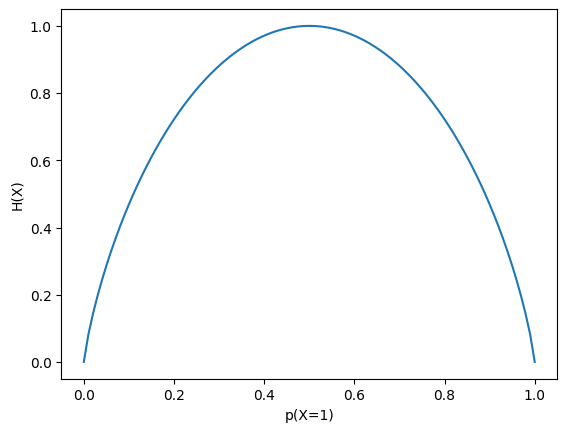

In [ ]:
eps = np.finfo(float).eps
p = np.linspace(0+eps, 1-eps, 100)
H = np.empty(p.shape)
for i, theta in enumerate(p):
    H[i] = calc_entropy(np.array([theta, 1-theta]))

pl.plot(p, H)
pl.xlabel('p(X=1)'); pl.ylabel('H(X)')
pl.show()

##3.2 Kullback-Leibler (KL) divergence or Relative Entropy

KL divergence measures how dissimilar two probability distributions are.
\begin{equation}
    \mathrm{KL}(p||q) := \sum_x p(x) log_n \frac{p(x)}{q(x)}
\end{equation}

In [ ]:
def calc_KL(p, q):
    return np.sum(p*np.log2(p/q)) #from scipy import stats as st; st.entropy(p, q, base=2)

print('KL(p||p)', calc_KL(pX, pX)) #Note min(KL) is zero when iff p=q
print('KL(p||q)', calc_KL(pX, pY))
print('KL(q||p)', calc_KL(pY, pX)) # Note KL is not symmetric

KL(p||p) 0.0
KL(p||q) 0.018621880878296346
KL(q||p) 0.018226398830013986


##3.3 Mutual Information (MI)  - optional

MI measures how much knowing one random variable tells about the other (dependence).
\begin{equation}
    \mathrm{I}(X;Y) := \sum_x \sum_y p(x,y) log_n \frac{p(x,y)}{p(x) p(y)}
\end{equation}

Note: If two random variables are independent, then $p(X,Y)=p(X)p(Y)$ and hence $\mathrm{I}(X;Y)=0$.

For two events (not random variables), pointwise mutual information (PMI) is defined as,
\begin{equation}
    \mathrm{PMI}(x,y) := log_n \frac{p(x,y)}{p(x) p(y)}
\end{equation}


**Exercise 3.3.1** Associated Press Newswire Corpus (1988) contains 44 million words. Individual words "set", "up", "off", "out", "on", "in" and "about" have been found 13046,64601, 20693, 47956, 258170, 739932 and 82319 times respectively. Similarly, hypothetical phrasal verbs "set up", "set off", "set out", "set on", "set in" and "set about" have been found 2713, 463, 301, 162, 795 and 16 respectively. Use PMI to determine which of the hypothetical phrasal verbs are more likely to be commonly used phrasal verbs.

Reference: W.C. Kenneth and H. Patrick. "Word association norms, mutual information, and lexicography". Computational Linguistics. vol.16(1) 1990.

In [ ]:
#Answer
import numpy as np

verb = np.array([13046])[:,np.newaxis]
preps_list = ['up', 'off', 'out', 'on', 'in', 'about']
preps = np.array([64601, 20693, 47956, 258170, 739932, 82319])[:,np.newaxis]
co_oc = np.array([2713, 463, 301, 162, 795, 16])[:,np.newaxis]

#corpus of 1988 Associated Press newswire

def PMI(p_x, p_y, p_xy, total):
    return np.log2(total*p_xy/(p_x*p_y)) #/ (-np.log2(p_xy/total)) normalization

for i in range(preps.shape[0]):
    PMI_score = PMI(verb[0,:], preps[i, :], co_oc[i, :], 44E6)
    print('PMI of set ' + preps_list[i], PMI_score)

PMI of set up [7.14608473]
PMI of set off [6.23769346]
PMI of set out [4.40387624]
PMI of set on [1.08156844]
PMI of set in [1.85745816]
PMI of set about [-0.60925756]


## 4. Bayes' Rule

\begin{equation}
    p(Y=y|X=x) = \frac{p(X=x|Y=y) p(Y=y)}{\sum_{y'} p(X=x|Y=y')p(Y=y')}
\end{equation}

**Exercise 4.1.1**

0.4% of a population is having a particular genetic disorder. In order to test the disorder, a person has undergone a medical test which has a **sensitivity** of 80% (if a person has the disorder, the test result will be positive with a probability of 0.8) and a **false alarm** of 10%. If the test is positive, what is the probability of person the having the particular genetic disorder?

Answer


Let $x=1$ be positive test results and $x=0$ be negative test results.

Let $y=1$ be the person has a cancer and $y=0$ be the person does not have a cancer.

* prior: $p(Y=1) = 0.004$ and $p(Y=0) = 1-0.004 = 0.996$

* sensitivity: $p(X=1|Y=1) = 0.8$

* false positive/alarm: $p(X=1|Y=0) = 0.1$

\begin{equation}
    p(Y=1|X=1) = \frac{p(X=1|Y=1) p(Y=1)}{p(X=1|Y=1)p(Y=1)+p(X=1|Y=0)p(Y=0)}
    = \frac{0.8 \times 0.004}{0.8 \times 0.004 + 0.1 \times 0.996}
    = 0.0311 \approx 3\%
\end{equation}

# Rejection sampling

Ransalu Senanayake

Theory: Bishop's chapter 11.1.2.

In [ ]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

# from sklearn.neighbors.kde import KernelDensity
from sklearn.neighbors import KernelDensity

In [ ]:
def normal_pdf(z, mu, sigma):
    constant = 1/np.sqrt(2*np.pi*sigma**2)
    y_pdf = constant * np.exp(- ((z-mu)**2) / (2*sigma**2))
    return y_pdf

def complex_pdf(z):
    p_z = 0.4*normal_pdf(z, -3, 1) + 0.6*normal_pdf(z, 1, 1)
    return p_z

Let's consider $p(z) = \frac{\tilde{p}(z)}{Z_p}$ where $Z_p$ is an unknown normalizing constant.

Although we want to obtain samples from $p(z)$, it is not possible because it is a complicated distribution. Although it cannot be sampled, its probability dinsity can be easily evaluated. We use a another distribution $q(Z)$ which can be easily sampled.

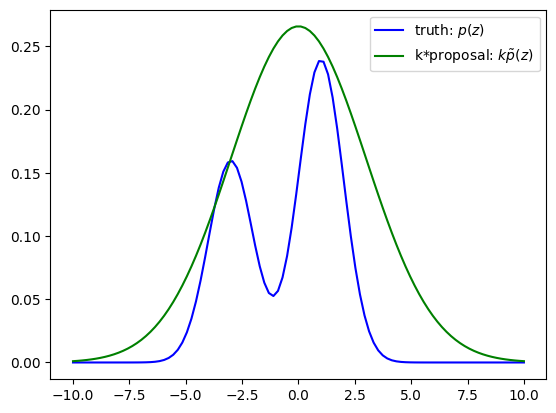

In [ ]:
z = np.linspace(-10,10,100)

# We want to obtain samples from this distribution p(z)
p = complex_pdf(z)

# Let's consider a propasal distribution q(z)
k = 2 # k is chosen such that k*q(z) >= pt(z)
q_mu, q_sig = 0, 3
kq = k*normal_pdf(z, q_mu, q_sig)

#Plot
pl.plot(z, p, c='b', label='truth: '+r'$p(z)$')
pl.plot(z, kq, c='g', label='k*proposal: '+r'$k\tilde{p}(z)$')
pl.legend();

There are five steps involved,
* Step 0: pick $k$ and $q(z)$
* Step 1: draw a sample $z_m$ from $q(z)$
* Step 2: evaluate $k*q(z_m)$
* Step 3: draw a sample from the uniform distribution $\mathcal{U}[0,k*q(z_m)]$
* Step 4: evaluate $p(z_m)$
* Step 5: keep $z_m$ if $z_m \leq p(z_m)$ i.e. within the region

Perform this $M$ times.

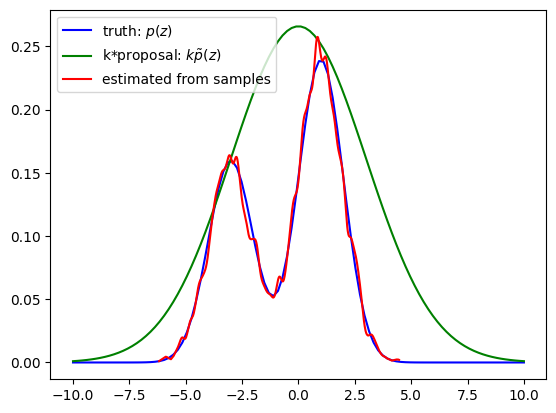

In [ ]:
M = 10000
keep = []
for i in range(M):
    z_m = np.random.normal(loc=q_mu, scale=q_sig, size=1) # Step 1: draw a sample from q

    k_q_z_m = k*normal_pdf(z_m, q_mu, q_sig) # Step 2: evaluate k*q(z_m)
    u0 = np.random.uniform(low=0, high=k_q_z_m, size=1) # Step 3: draw from a uniform distribution

    p_z_m = complex_pdf(z_m) # Step 4: evaluate p(z_m)

    if u0 <= p_z_m: #Step 5: keep if in the region
        keep.append(z_m[0])

#Let's use KDE to get a continuous representation of the distribution from samples
keep = np.sort(np.array(keep))[:,None]
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(keep)
q_veri = np.exp(kde.score_samples(keep))

pl.plot(z, p, c='b', label='truth: '+r'$p(z)$')
pl.plot(z, kq, c='g', label='k*proposal: '+r'$k\tilde{p}(z)$')
pl.plot(keep.ravel(), q_veri, c='r', label='estimated from samples')
pl.legend();

# Importance sampling

Ransalu Senanayake

Theory: Refer Bishop's chapter 11.4.

In [ ]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

# from sklearn.neighbors.kde import KernelDensity
from sklearn.neighbors import KernelDensity

In [ ]:
def normal_pdf(z, mu, sigma):
    constant = 1/np.sqrt(2*np.pi*sigma**2)
    y_pdf = constant * np.exp(- ((z-mu)**2) / (2*sigma**2))
    return y_pdf

def unknown_pdf(z):
    p_z = 0.4*normal_pdf(z, -3, 1) + 0.6*normal_pdf(z, 1, 1)
    return p_z

def uniform_pdf(z, a, b):
    constant = 1/(b-a)
    y_pdf = constant*np.ones(z.shape[0])
    inside = np.logical_and(z>=a, z<=b)
    y_pdf *= inside
    return y_pdf

## 1. Evaluating the expectation of a function

Let's consider a function $f(z)$ and we want to evaluate its expectation under the distribution $p(z)$. If we can directly sample $p(z)$ (i.e. we know what this distribution is),

\begin{align}
    \mathbb{E}[f] &= \int f(z)p(z) \mathrm{d}z \\
    &= \frac{1}{M} \sum_{m=1}^{M} f(z^{(m)})
\end{align}

where $z^{(m)}$ are samples drawn from $p(z)$. This involves three steps,
* Step 1: Draw samples $z_m$ from $p(z)$
* Step 2: Evaluate $f(z_m)$
* Step 3: Compute the average of $f(z_m)$.

Let us consider the following function.

\begin{equation}
f(z) =  0.02*(\exp(-0.1z) \sin(3z) + 0.1z + 4)
\end{equation}

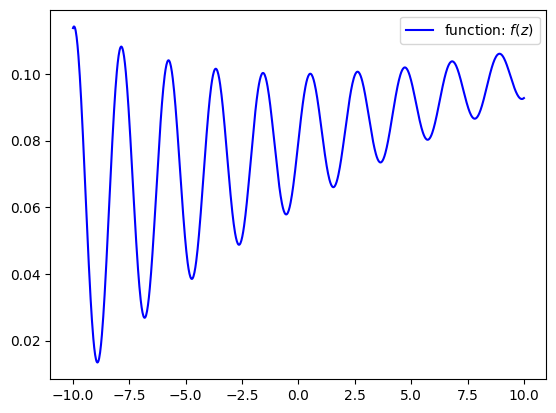

In [ ]:
z = np.linspace(-10,10,1000)

def my_func(z):
    return 0.02*(np.exp(-0.1*z)*np.sin(3*z) + 0.1*z + 4)

f = my_func(z)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.legend();

**Case 1:** Let us sample from a uniform distribution.

$p(z) = \mathcal{U}(-8,8)$

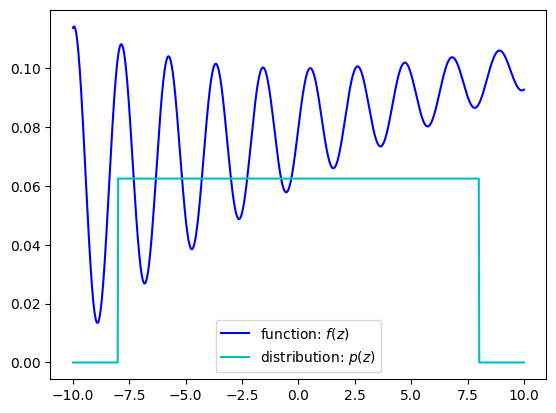

In [ ]:
p = uniform_pdf(z, a=-8, b=8)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='c', label='distribution: '+r'$p(z)$')
pl.legend();

E[f]= 0.08177034619680905


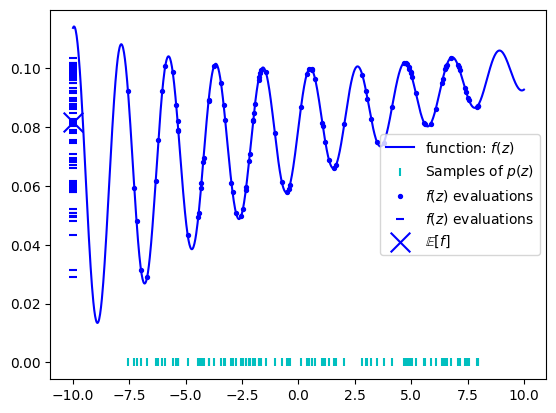

In [ ]:
M = 100
z_n = np.random.uniform(-8, 8, size=M) # Step 1: draw a sample from p.
f_z_n = my_func(z_n) # Step 2: evaluate f on samples of z.
E_f = np.average(f_z_n) # Step 3: compute the average.
print('E[f]=', E_f)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.scatter(z_n, np.zeros(z_n.shape[0]), c='c', marker='|', label=r'Samples of $p(z)$')
pl.scatter(z_n, f_z_n, c='b', s=8, label=r'$f(z)$ evaluations')
pl.scatter(np.zeros(z_n.shape[0])-10, f_z_n, c='b', marker='_', label=r'$f(z)$ evaluations')
pl.scatter(-10, E_f, c='b', s=200, marker='x', label=r'$\mathbb{E}[f]$')
pl.legend();

**Case 2:** Let us sample from a narrow normal distribution.

$p(z) = \mathcal{N}(-2,0.1)$

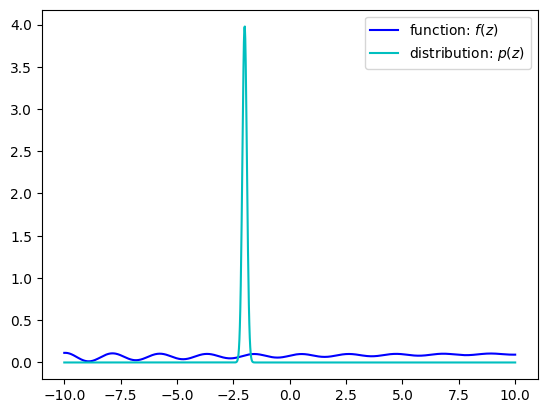

In [ ]:
p = normal_pdf(z, mu=-2, sigma=0.1)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='c', label='distribution: '+r'$p(z)$')
pl.legend();

E[f]= 0.07553521584496348


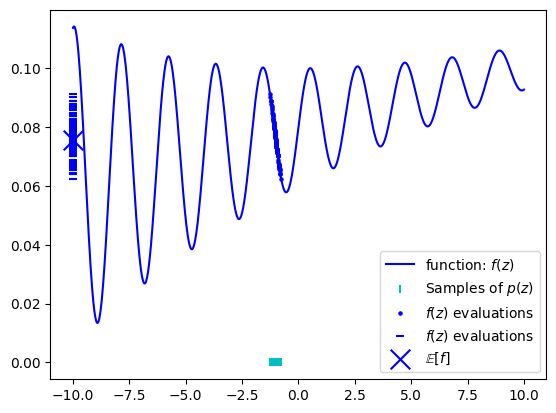

In [ ]:
M =10
z_n = np.random.normal(loc=-1, scale=0.1, size=N) # Step 1: draw a sample from p.
f_z_n = my_func(z_n) # Step 2: evaluate f on samples of z.
E_f = np.average(f_z_n) # Step 3: compute the average.
print('E[f]=', E_f)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.scatter(z_n, np.zeros(z_n.shape[0]), c='c', marker='|', label=r'Samples of $p(z)$')
pl.scatter(z_n, f_z_n, c='b', s=5, label=r'$f(z)$ evaluations')
pl.scatter(np.zeros(z_n.shape[0])-10, f_z_n, c='b', marker='_', label=r'$f(z)$ evaluations')
pl.scatter(-10, E_f, c='b', s=200, marker='x', label=r'$\mathbb{E}[f]$')
pl.legend();

**Case 3:** Let us sample from a wide normal distribution.

$p(z) = \mathcal{N}(-3, 2)$

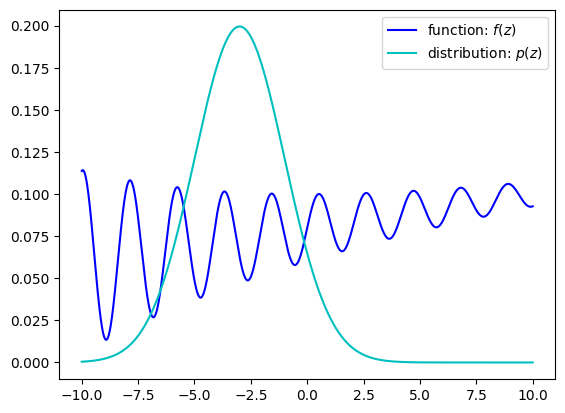

In [ ]:
p = normal_pdf(z, mu=-3, sigma=2)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='c', label='distribution: '+r'$p(z)$')
pl.legend();

E[f]= 0.07491140881764269


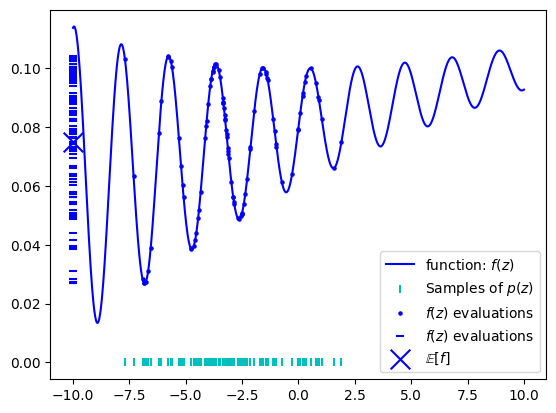

In [ ]:
M =50
z_n = np.random.normal(loc=-3, scale=2, size=N) # Step 1: draw a sample from p.
f_z_n = my_func(z_n) # Step 2: evaluate f on samples of z.
E_f = np.average(f_z_n) # Step 3: compute the avberage.
print('E[f]=', E_f)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.scatter(z_n, np.zeros(z_n.shape[0]), c='c', marker='|', label=r'Samples of $p(z)$')
pl.scatter(z_n, f_z_n, c='b', s=5, label=r'$f(z)$ evaluations')
pl.scatter(np.zeros(z_n.shape[0])-10, f_z_n, c='b', marker='_', label=r'$f(z)$ evaluations')
pl.scatter(-10, E_f, c='b', s=200, marker='x', label=r'$\mathbb{E}[f]$')
pl.legend();

## Importance sampling

What if we don't know the distribution $p(z)$, but we can evaluate it. Because we don't know $p(z)$, we can't sample from it. Therefore, we introduce a *proposal distribution* whose form is known and hence we can sample from it.

\begin{align}
    \mathbb{E}[f] &= \int f(z)p(z) \mathrm{d}z \\
    &= \int f(z) \frac{p(z)}{q(z)} q(z) \mathrm{d}z \\
    &= \frac{1}{M} \sum_{m=1}^{M} \frac{p(z^{(m)})}{q(z^{(m)})} f(z^{(m)})
\end{align}

where $z^{(m)}$ are samples drawn from $q(z)$. This involves 5 steps,
* Step 1: Draw samples $z_m$ from $q(z)$
* Step 2: Evaluate $q(z_m)$
* Step 3: Evaluate $p(z_m)$
* Step 4: Evaluate $f(z_m)$
* Step 5: Compute the weighted average of $f(z_m)$ with the weights $p(z_m)/q(z_m)$.

**Case 1:**

$p(z) = \mathcal{N}(-3, 2)$ Let us pretend we can't sample from this, but we can evaluate the probability density.

$q(z) = \mathcal{N}(-3, 3)$ Let us sample from a wide normal distribution around $p(z)$.

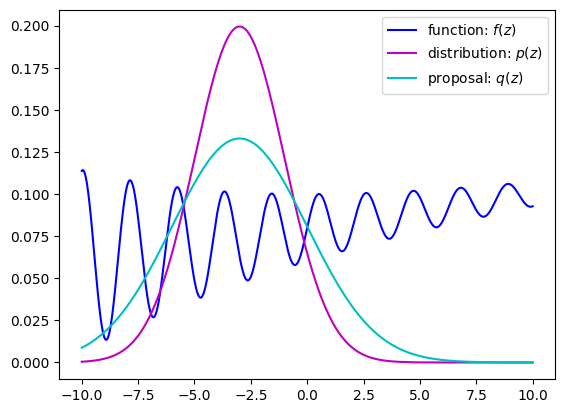

In [ ]:
q_mu, q_sig = -3, 3

f = my_func(z)
p = normal_pdf(z, mu=-3, sigma=2)
q = normal_pdf(z, mu=q_mu, sigma=q_sig)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.legend();

E[f]= 0.08000755114565344


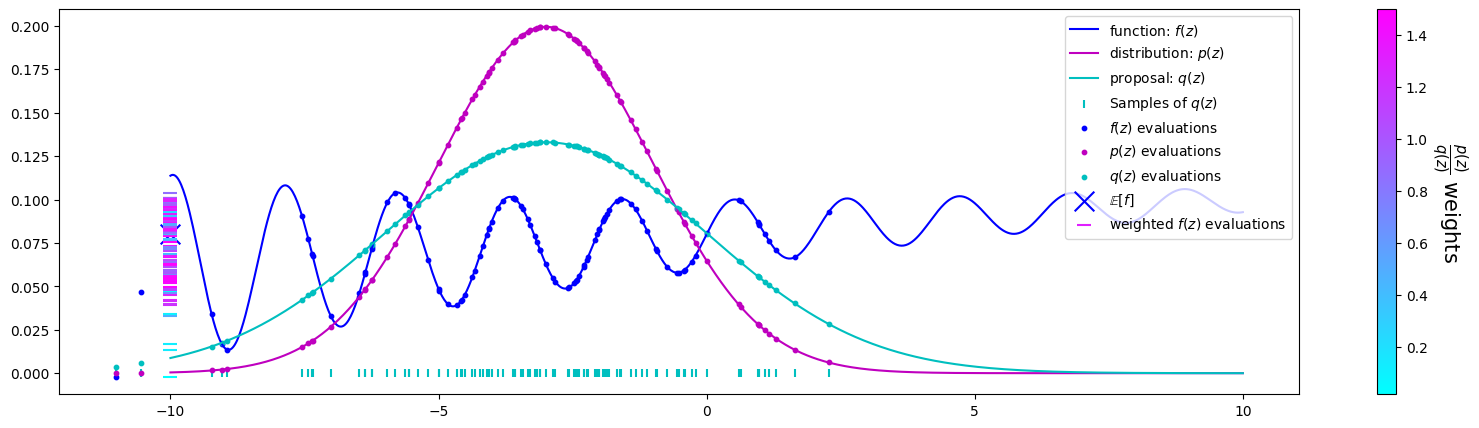

In [ ]:
M =20
z_n = np.random.normal(loc=q_mu, scale=q_sig, size=N) # Step 1: draw a sample from q.
q_z_n = normal_pdf(z_n, mu=q_mu, sigma=q_sig) # Step 2: evaluate q on samples of z.
p_z_n = normal_pdf(z_n, mu=-3, sigma=2) # Step 3: evaluate p on samples of z.
f_z_n = my_func(z_n) # Step 4: evaluate f on samples of z.
E_f = np.average(p_z_n/q_z_n*f_z_n) # Step 5: compute the avberage.
print('E[f]=', E_f)

#Plot
pl.figure(figsize=(20,5))
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.scatter(z_n, np.zeros(z_n.shape[0]), c='c', marker='|', label=r'Samples of $q(z)$')
pl.scatter(z_n, f_z_n, c='b', s=10, label=r'$f(z)$ evaluations')
pl.scatter(z_n, p_z_n, c='m', s=10, label=r'$p(z)$ evaluations')
pl.scatter(z_n, q_z_n, c='c', s=10, label=r'$q(z)$ evaluations')
pl.scatter(-10, E_f, c='b', s=200, marker='x', label=r'$\mathbb{E}[f]$')
pl.scatter(np.zeros(z_n.shape[0])-10, f_z_n, c=p_z_n/q_z_n, marker='_', s=100, cmap='cool', label=r'weighted $f(z)$ evaluations')
cbar = pl.colorbar()
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel(r'$\frac{p(z)}{q(z)}$ weights', rotation=270, fontsize=15)
pl.legend(loc=1);

**Case 2:**

$p(z) = \mathcal{N}(-3, 2)$ Let us pretend we can't sample from this, but we can evaluate the probability density.

$q(z) = \mathcal{N}(3, 3)$ Let us sample from a distribution completely off from $p(z)$.

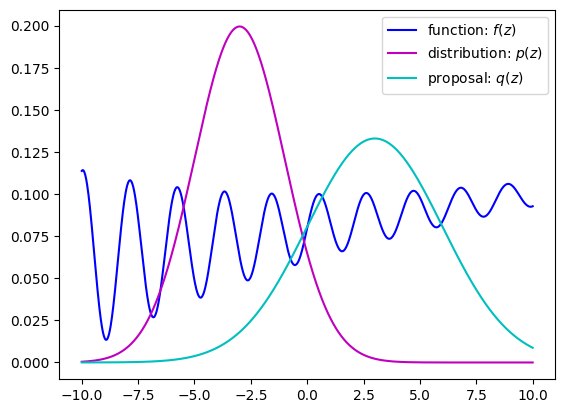

In [ ]:
q_mu, q_sig = 3, 3

f = my_func(z)
p = normal_pdf(z, mu=-3, sigma=2)
q = normal_pdf(z, mu=q_mu, sigma=q_sig)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.legend();

E[f]= 0.08190732218215942


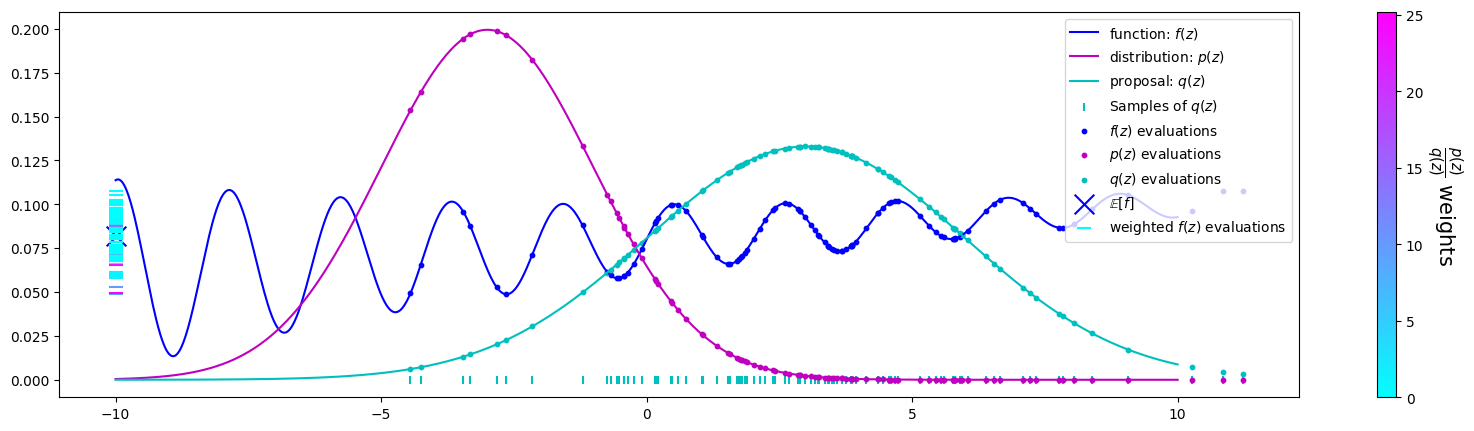

In [ ]:
M =20
z_n = np.random.normal(loc=q_mu, scale=q_sig, size=N) # Step 1: draw a sample from q.
q_z_n = normal_pdf(z_n, mu=q_mu, sigma=q_sig) # Step 2: evaluate q on samples of z.
p_z_n = normal_pdf(z_n, mu=-3, sigma=2) # Step 3: evaluate p on samples of z.
f_z_n = my_func(z_n) # Step 4: evaluate f on samples of z.
E_f = np.average(p_z_n/q_z_n*f_z_n) # Step 5: compute the avberage.
print('E[f]=', E_f)

#Plot
pl.figure(figsize=(20,5))
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.scatter(z_n, np.zeros(z_n.shape[0]), c='c', marker='|', label=r'Samples of $q(z)$')
pl.scatter(z_n, f_z_n, c='b', s=10, label=r'$f(z)$ evaluations')
pl.scatter(z_n, p_z_n, c='m', s=10, label=r'$p(z)$ evaluations')
pl.scatter(z_n, q_z_n, c='c', s=10, label=r'$q(z)$ evaluations')
pl.scatter(-10, E_f, c='b', s=200, marker='x', label=r'$\mathbb{E}[f]$')
pl.scatter(np.zeros(z_n.shape[0])-10, f_z_n, c=p_z_n/q_z_n, marker='_', s=100, cmap='cool', label=r'weighted $f(z)$ evaluations')
cbar = pl.colorbar()
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel(r'$\frac{p(z)}{q(z)}$ weights', rotation=270, fontsize=15)
pl.legend(loc=1);

**Case 3:**

$p(z) = \mathcal{N}(-3, 2)$ Let us pretend we can't sample from this, but we can evaluate the probability density.

$q(z) = \mathcal{N}(-3, 3)$ Let us sample from a distribution exactly the same as $p(z)$. It is not possible to pick such $q(z)$ in practice. However, let us assume this happened by chance. In this case, weights are $1$ because $p(z_m)=q(z_m)$. Further, we expect results to be similar to case 3 in section 1.

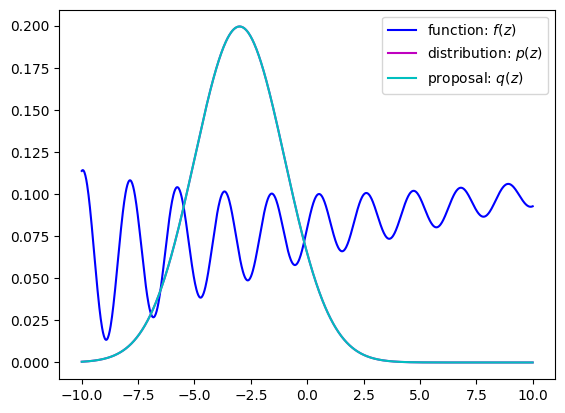

In [ ]:
q_mu, q_sig = -3, 2

f = my_func(z)
p = normal_pdf(z, mu=-3, sigma=2)
q = normal_pdf(z, mu=q_mu, sigma=q_sig)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.legend();

E[f]= 0.07328872893474869


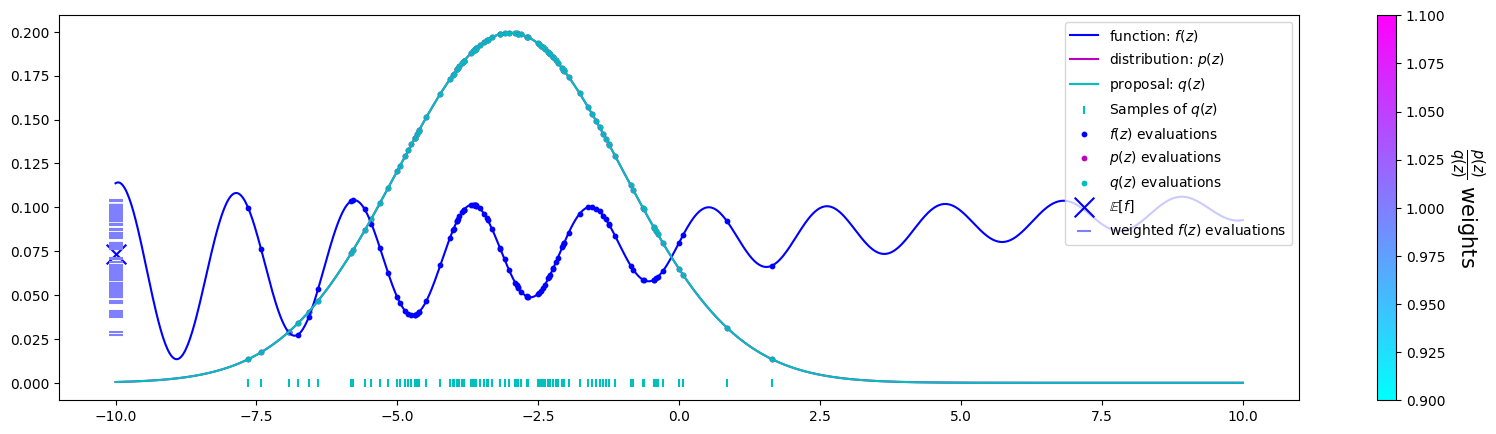

In [ ]:
M =50
z_n = np.random.normal(loc=q_mu, scale=q_sig, size=N) # Step 1: draw a sample from q.
q_z_n = normal_pdf(z_n, mu=q_mu, sigma=q_sig) # Step 2: evaluate q on samples of z.
p_z_n = normal_pdf(z_n, mu=-3, sigma=2) # Step 3: evaluate p on samples of z.
f_z_n = my_func(z_n) # Step 4: evaluate f on samples of z.
E_f = np.average(p_z_n/q_z_n*f_z_n) # Step 5: compute the avberage.
print('E[f]=', E_f)

#Plot
pl.figure(figsize=(20,5))
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.scatter(z_n, np.zeros(z_n.shape[0]), c='c', marker='|', label=r'Samples of $q(z)$')
pl.scatter(z_n, f_z_n, c='b', s=10, label=r'$f(z)$ evaluations')
pl.scatter(z_n, p_z_n, c='m', s=10, label=r'$p(z)$ evaluations')
pl.scatter(z_n, q_z_n, c='c', s=10, label=r'$q(z)$ evaluations')
pl.scatter(-10, E_f, c='b', s=200, marker='x', label=r'$\mathbb{E}[f]$')
pl.scatter(np.zeros(z_n.shape[0])-10, f_z_n, c=p_z_n/q_z_n, marker='_', s=100, cmap='cool', label=r'weighted $f(z)$ evaluations')
cbar = pl.colorbar()
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel(r'$\frac{p(z)}{q(z)}$ weights', rotation=270, fontsize=15)
pl.legend(loc=1);

**Case 4:**
$p(z)$ - Let this be a complex pdf that we can't sample, but we can evaluate.

$q(z) = \mathcal{N}(-1, 3)$ Let us pick a proposal wide enough.

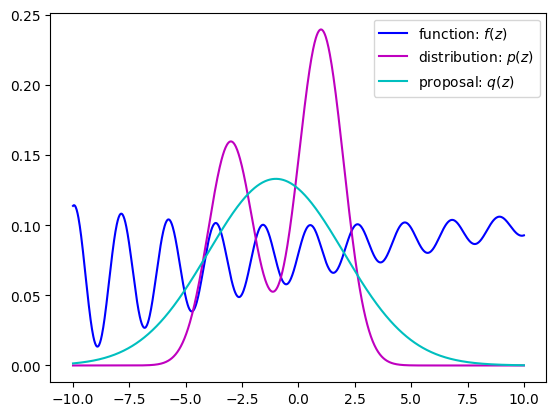

In [ ]:
q_mu, q_sig = -1, 3

f = my_func(z)
p = unknown_pdf(z)
q = normal_pdf(z, mu=q_mu, sigma=q_sig)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.legend();

E[f]= 0.07162426712889355


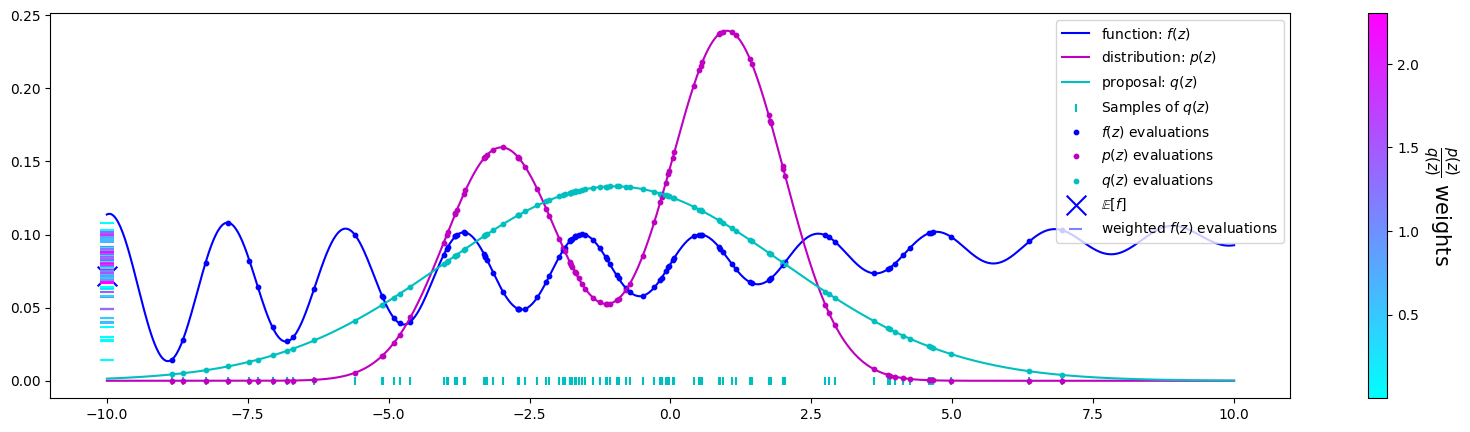

In [ ]:
M =10
z_n = np.random.normal(loc=q_mu, scale=q_sig, size=N) # Step 1: draw a sample from q.
q_z_n = normal_pdf(z_n, mu=q_mu, sigma=q_sig) # Step 2: evaluate q on samples of z.
p_z_n = unknown_pdf(z_n) # Step 3: evaluate p on samples of z.
f_z_n = my_func(z_n) # Step 4: evaluate f on samples of z.
E_f = np.average(p_z_n/q_z_n*f_z_n) # Step 5: compute the avberage.
print('E[f]=', E_f)

#Plot
pl.figure(figsize=(20,5))
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.scatter(z_n, np.zeros(z_n.shape[0]), c='c', marker='|', label=r'Samples of $q(z)$')
pl.scatter(z_n, f_z_n, c='b', s=10, label=r'$f(z)$ evaluations')
pl.scatter(z_n, p_z_n, c='m', s=10, label=r'$p(z)$ evaluations')
pl.scatter(z_n, q_z_n, c='c', s=10, label=r'$q(z)$ evaluations')
pl.scatter(-10, E_f, c='b', s=200, marker='x', label=r'$\mathbb{E}[f]$')
pl.scatter(np.zeros(z_n.shape[0])-10, f_z_n, c=p_z_n/q_z_n, marker='_', s=100, cmap='cool', label=r'weighted $f(z)$ evaluations')
cbar = pl.colorbar()
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel(r'$\frac{p(z)}{q(z)}$ weights', rotation=270, fontsize=15)
pl.legend(loc=1);

**Case 5:**
$p(z)$ - Let this be a complex pdf that we can't sample, but we can evaluate.

$q(z) = \mathcal{N}(0, 0.5)$ How about a narrow proposal?

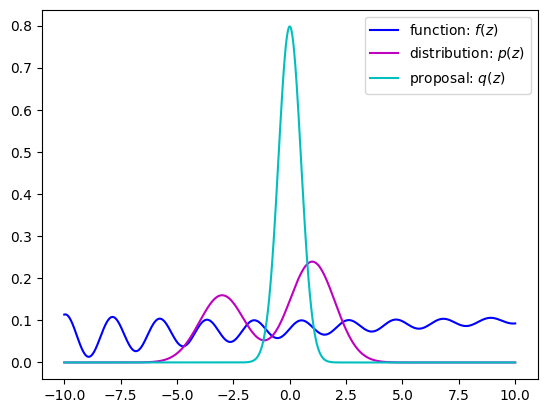

In [ ]:
q_mu, q_sig = 0, 0.5

f = my_func(z)
p = unknown_pdf(z)
q = normal_pdf(z, mu=q_mu, sigma=q_sig)

#Plot
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.legend();

E[f]= 0.04381961554562412


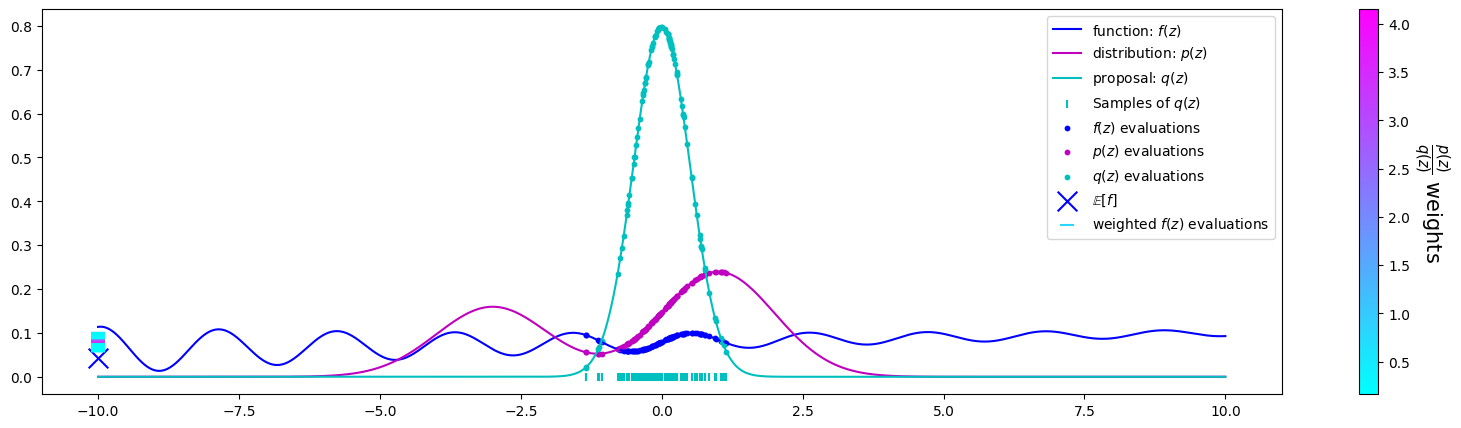

In [ ]:
M =10
z_n = np.random.normal(loc=q_mu, scale=q_sig, size=N) # Step 1: draw a sample from q.
q_z_n = normal_pdf(z_n, mu=q_mu, sigma=q_sig) # Step 2: evaluate q on samples of z.
p_z_n = unknown_pdf(z_n) # Step 3: evaluate p on samples of z.
f_z_n = my_func(z_n) # Step 4: evaluate f on samples of z.
E_f = np.average(p_z_n/q_z_n*f_z_n) # Step 5: compute the avberage.
print('E[f]=', E_f)

#Plot
pl.figure(figsize=(20,5))
pl.plot(z, f, c='b', label='function: '+r'$f(z)$')
pl.plot(z, p, c='m', label='distribution: '+r'$p(z)$')
pl.plot(z, q, c='c', label='proposal: '+r'$q(z)$')
pl.scatter(z_n, np.zeros(z_n.shape[0]), c='c', marker='|', label=r'Samples of $q(z)$')
pl.scatter(z_n, f_z_n, c='b', s=10, label=r'$f(z)$ evaluations')
pl.scatter(z_n, p_z_n, c='m', s=10, label=r'$p(z)$ evaluations')
pl.scatter(z_n, q_z_n, c='c', s=10, label=r'$q(z)$ evaluations')
pl.scatter(-10, E_f, c='b', s=200, marker='x', label=r'$\mathbb{E}[f]$')
pl.scatter(np.zeros(z_n.shape[0])-10, f_z_n, c=p_z_n/q_z_n, marker='_', s=100, cmap='cool', label=r'weighted $f(z)$ evaluations')
cbar = pl.colorbar()
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel(r'$\frac{p(z)}{q(z)}$ weights', rotation=270, fontsize=15)
pl.legend(loc=1);

This estimation is not good enough because the entire $p(z)$ distribution has not been explored.

### 3. What if p(z) can only be evaluated up to a normalization constant. Bayesian learning.

In [ ]:
#TBD

#  Markov chain Monte Carlo (MCMC)  
## Matropolis-Hastings Algorithm

Ransalu Senanayake

Theory: Bishop's chapter 11.2.

In [ ]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

# from sklearn.neighbors.kde import KernelDensity
from sklearn.neighbors import KernelDensity

In [ ]:
def normal_pdf(z, mu, sigma):
    constant = 1/np.sqrt(2*np.pi*sigma**2)
    y_pdf = constant * np.exp(- ((z-mu)**2) / (2*sigma**2))
    return y_pdf

def complex_pdf(z):
    p_z = 0.4*normal_pdf(z, -3, 1) + 0.6*normal_pdf(z, 1, 1)
    return p_z

Let's consider $p(z) = \frac{\tilde{p}(z)}{Z_p}$ where $Z_p$ is an unknown normalizing constant.

We want to obtain samples from $p(z)$, it is not possible because it is a complicated distribution. Although it cannot be sampled, its probability density can be easily evaluated. We use a another distribution, named the proposal distribution, $q(Z)$ which can be easily sampled.

## 1. Metropolis algorithm

There are five steps involved,
* Step 0: pick an initial sample $z_t$ and pick $q(z)$---a distribution that is simple enough to be sampled
* Step 1: draw a sample $z_m$ from $q(z)$
* Step 2: evaluate $p(z_t)$ and $p(z_m)$
* Step 3: evaluate the acceptance ration $a(z_t \rightarrow z_m) = \min(1,p(z_m)/p(z_t))$
* Step 4: draw a sample $u$ from the uniform distribution $\mathcal{U}[0,1]$
* Step 5: if $a(z_t \rightarrow z_m) > u$, keep $z_m$ and set $z_t = z_m$ (a new jump); otherwise Step 1.

Perform this $M$ times.

The concept behind step 5 is, if the density of the new sample $z_m$ is higher than the previous sample $z_t$, it is always retained. Otherewise, sometimes it is retained and sometimes rejected. This notion of "sometimes" comes from the uniform distribution. Technically, the sample is accepted with probability $a$.

In this case we assume that $q(z_m|z_t) = q(z_t|z_m)$.

**Example 1**

True distribution: a complicated bimodal distribution

Proposal distribution: $\mathcal{N}(0,3)$

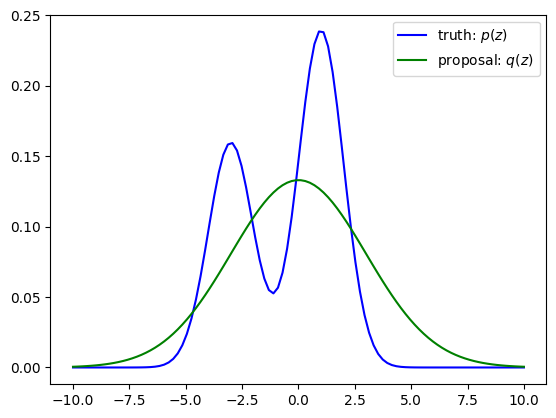

In [ ]:
z = np.linspace(-10,10,100)

# We want to obtain samples from the distribution p(z)
p = complex_pdf(z)

# Let's consider a propasal distribution q(z)
q_mu, q_sig = 0, 3
q = normal_pdf(z, q_mu, q_sig)

#Plot
pl.plot(z, p, c='b', label='truth: '+r'$p(z)$')
pl.plot(z, q, c='g', label='proposal: '+r'$q(z)$')
pl.legend();

In [ ]:
def metropolis(q, p, M=100, z_0=0):
    keep = [] #accepted samples
    track = [] #keep track of all steps for visualization purposes

    z_t = z_0 # Step 0: pick an initial position

    for i in range(M):
        z_m = q() # Step 1: draw a sample from q

        p_z_m = p(z_m) # Step 2: compute the density
        p_z_t = p(z_t) # Step 2: compute the density

        A = np.minimum(1, p_z_m/p_z_t) # Step 3: calculate the accpetance probability

        u = np.random.uniform(low=0, high=1, size=1) # Step 4: draw a sample from a uniform distribution

        track.append((z_t, p_z_t, z_m, p_z_m, u <= A))

        if u <= A: #Step 5: keep if in the region
            keep.append(z_m)
            z_t = z_m

    return np.array(keep, dtype=object), np.array(track, dtype=object)

In [ ]:
def plot(track):
    M = track.shape[0]
    pl.figure(figsize=(20,5))
    pl.plot(z, p, c='b', label='truth: '+r'$p(z)$', alpha=0.5)
    pl.plot(z, q, c='g', label='proposal: '+r'$\tilde{p}(z)$', alpha=0.5)
    for m in range(M):
        if track[m,4] == True:
            col = 'm'
            pl.annotate('', xy=(track[m,2], track[m,3]), xycoords='data',
                    xytext=(track[m,0], track[m,1]), textcoords='data',
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=col))
        else:
            col = 'c'
            pl.annotate('', xy=(track[m,2], track[m,3]), xycoords='data',
                     xytext=(track[m,0], track[m,1]), textcoords='data',
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=col))
        xpos = track[m,0] + (track[m,2] - track[m,0])/2
        ypos = track[m,1] + (track[m,3] - track[m,1])/2
        pl.text(xpos, ypos+5e-3, str(m), color=col)
    pl.scatter(track[:,2], np.zeros(track.shape[0]), c=track[:,4], s=100,  marker='|', cmap='cool')
    cbar = pl.colorbar()
    cbar.ax.get_yaxis().labelpad = 30
    cbar.ax.set_ylabel('accepted-rejected samples', rotation=270, fontsize=13)

Let's consider 10 samples.

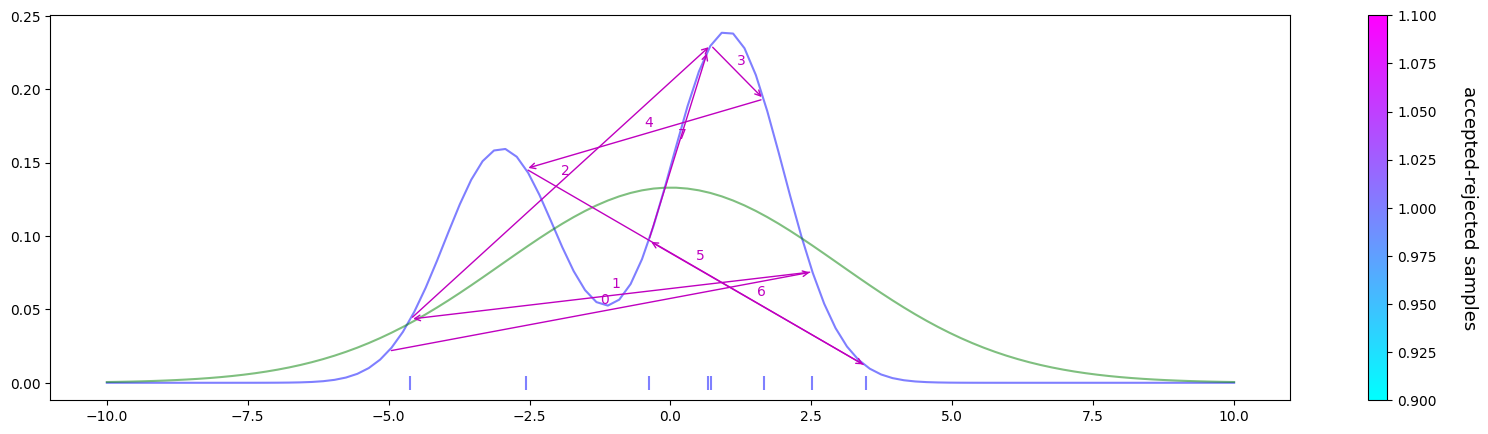

In [ ]:
def proposal():
    return np.random.normal(loc=q_mu, scale=q_sig, size=1)[0]

M = 8
keep, track = metropolis(q=proposal, p=complex_pdf, M=M, z_0=-5)
plot(track)

Now, let's use 1000 samples.

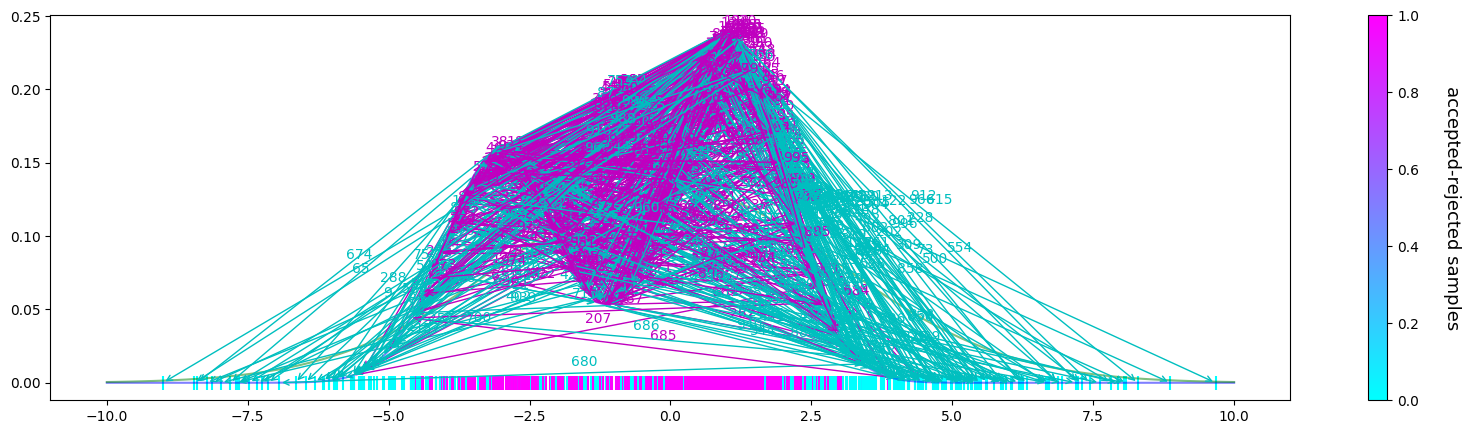

In [ ]:
M = 1000
keep, track = metropolis(q=proposal, p=complex_pdf, M=M, z_0=-5)
plot(track)

Acceptance rate = [0.1]%


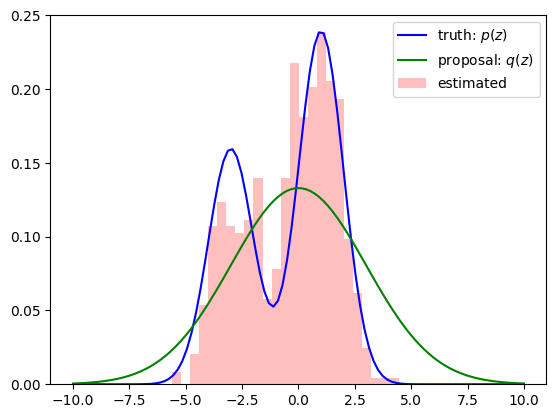

In [ ]:
pl.plot(z, p, c='b', label='truth: '+r'$p(z)$')
pl.plot(z, q, c='g', label='proposal: '+r'$q(z)$')
# pl.hist(keep, bins=25, normed=1, facecolor='r', alpha=0.25, label='estimated')
pl.hist(keep, bins=25, density=True, facecolor='r', alpha=0.25, label='estimated')  # Changed normed to density
pl.legend()

print('Acceptance rate = {}%'.format(np.round(np.sum(track[:,4])/M*100,1)))

**Example 2**

True distribution: a complicated bimodal distribution (same as in Example 1)

Proposal distribution: a narrow distribution $\mathcal{N}(-1,0.5)$. This is a bad proposal distribution.

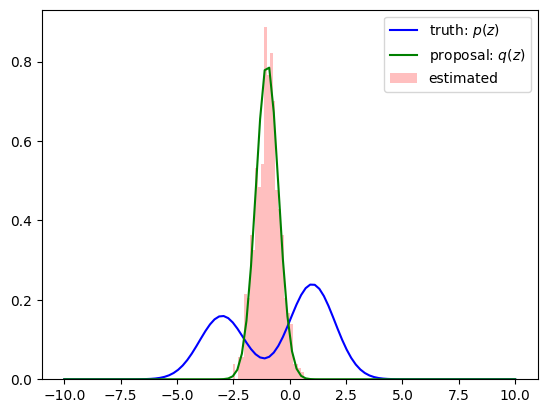

In [ ]:
q_mu, q_sig = -1, 0.5

def proposal():
    return np.random.normal(loc=q_mu, scale=q_sig, size=1)[0]

keep, track = metropolis(q=proposal, p=complex_pdf, M=1000, z_0=-5)

pl.plot(z, p, c='b', label='truth: '+r'$p(z)$')
pl.plot(z, normal_pdf(z, q_mu, q_sig), c='g', label='proposal: '+r'$q(z)$')
# pl.hist(keep, bins=25, normed=1, facecolor='r', alpha=0.25, label='estimated')
pl.hist(keep, bins=25, density=True, facecolor='r', alpha=0.25, label='estimated')  # Changed normed to density
pl.legend();

**Example 3**

True distribution: a 2D Gaussin distribution $\mathcal{N}([0,0],[1, 0.95; 0.95, 1])$.

Proposal distribution: an isotropic distribution $\mathcal{N}([0,0],[1, 0; 0, 1])$.

In [ ]:
import scipy.stats as st

Acceptance rate = 27.9%


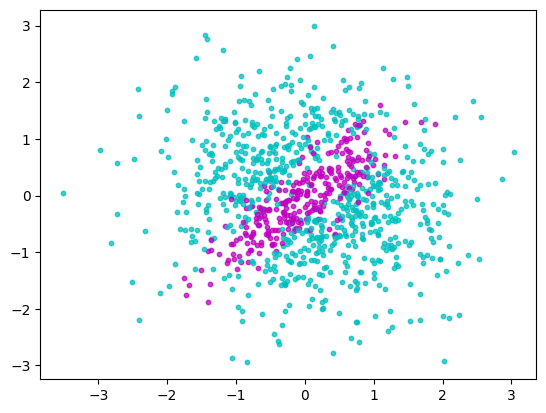

In [ ]:
def proposal():
    return np.random.normal(size=2, loc=0, scale=1)

def dist(z):
    return st.multivariate_normal.pdf(z, mean=np.array([0, 0]), cov=np.array([[1, 0.95], [0.95, 1]]))

M = 1000

keep, track = metropolis(q=proposal, p=dist, M=M, z_0=np.array([0,0]))

cnt = 0
for m in range(M):
    acc = track[:,4][m][0]
    if acc == True:
        col = 'm'
        cnt += 1
    else:
        col = 'c'
    pl.scatter(track[:,2][m][0], track[:,2][m][1], s=10, c=col, alpha=0.75)

print('Acceptance rate = {}%'.format(np.round(cnt/M*100,1)))

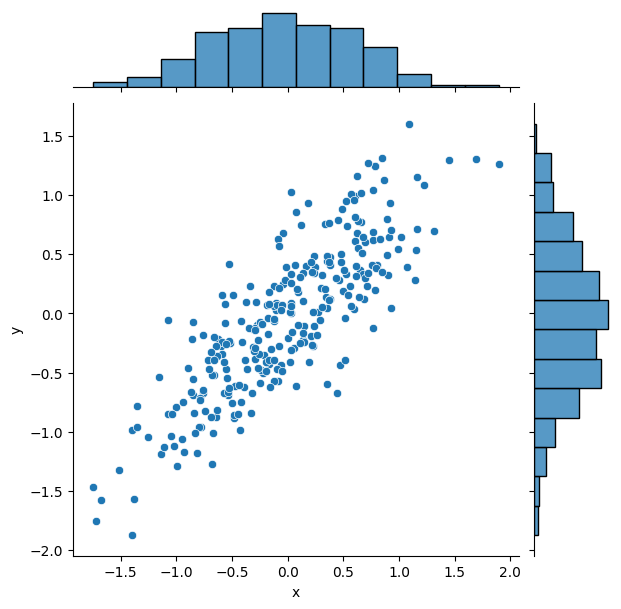

In [ ]:
import seaborn as sns
import matplotlib.pyplot as pl

# Create the jointplot
plot = sns.jointplot(x=keep[:, 0], y=keep[:, 1])

# Set axis labels
plot.set_axis_labels("x", "y")

# Show the plot
pl.show()

## 2. Metropolis-Hasting algorithm